1) Leia o arquivo lemonades.csv usando pandas

In [1]:
#CARREGANDO PACOTES
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import altair as alt

x = datetime.now()

print(x-datetime(1970,1,1))

#Lendo o arquivo "Lemonades"
lemon = pd.read_csv('https://s3-sa-east-1.amazonaws.com/dados-leonardo/Lemonade2016(2).csv', sep=';', parse_dates=['Date'])

#Visualizando os 10 primeiros registros
print (lemon.head(10))

#Visualizando os 10 últimos registros
print (lemon.tail(10))


18011 days, 17:02:22.756125
        Date Location  Lemon  Orange  Temperature  Leaflets  Price
0 2016-07-01     Park     97      67           70      90.0   0.25
1 2016-07-02     Park     98      67           72      90.0   0.25
2 2016-07-03     Park    110      77           71     104.0   0.25
3 2016-07-04    Beach    134      99           76      98.0   0.25
4 2016-07-05    Beach    159     118           78     135.0   0.25
5 2016-07-06    Beach    103      69           82      90.0   0.25
6 2016-07-06    Beach    103      69           82      90.0   0.25
7 2016-07-07    Beach    143     101           81     135.0   0.25
8        NaT    Beach    123      86           82     113.0   0.25
9 2016-07-09    Beach    134      95           80     126.0   0.25
         Date Location  Lemon  Orange  Temperature  Leaflets  Price
22 2016-07-22     Park    112      75           80     108.0   0.50
23 2016-07-23     Park    120      82           81     117.0   0.50
24 2016-07-24     Park    121  

2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [2]:
#Retornando informações sobre as colunas
print(lemon.dtypes)

#Retornando as principais estatísticas sobre o dataset
lemon.describe()

Date           datetime64[ns]
Location               object
Lemon                   int64
Orange                  int64
Temperature             int64
Leaflets              float64
Price                 float64
dtype: object


,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


3)Realize a limpeza do dataset:
- verifique se existe valores nulos
- remova duplicatas
- trate os elementos faltantes (interpolação e media)

In [3]:
#Removendo os valores duplicados
print('Duplicatas antes: ', lemon.duplicated().sum())
print ('\n')
lemon = lemon.drop_duplicates()
print('Duplicatas após: ', lemon.duplicated().sum())
print ('\n')

#trate os elementos faltantes (interpolação e media)
print('Valore faltantes antes:')

print(lemon.isna().sum())
print ('\n')

#Média
lemon['Leaflets'] = lemon['Leaflets'].fillna(lemon['Leaflets'].mean())

#Interpolação
tmp = lemon['Date'].apply(lambda d: (d-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True)
lemon['Date'] = pd.to_datetime(tmp, unit='s') 
lemon['Date'] = lemon['Date'].apply(lambda t: t.date())

print('Valore faltantes após:')
print(lemon.isna().sum())


Duplicatas antes:  1


Duplicatas após:  0


Valore faltantes antes:
Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


Valore faltantes após:
Date           0
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       0
Price          0
dtype: int64


4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja

In [4]:
lemon['Sales'] = lemon.Lemon + lemon.Orange
lemon

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,2016-07-01,Park,97,67,70,90.000000,0.25,164
1,2016-07-02,Park,98,67,72,90.000000,0.25,165
2,2016-07-03,Park,110,77,71,104.000000,0.25,187
3,2016-07-04,Beach,134,99,76,98.000000,0.25,233
4,2016-07-05,Beach,159,118,78,135.000000,0.25,277
5,2016-07-06,Beach,103,69,82,90.000000,0.25,172
7,2016-07-07,Beach,143,101,81,135.000000,0.25,244
8,2016-07-08,Beach,123,86,82,113.000000,0.25,209
9,2016-07-09,Beach,134,95,80,126.000000,0.25,229
10,2016-07-10,Beach,140,98,82,131.000000,0.25,238


5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [5]:
# Adicionando a coluna
lemon['Revenue'] = lemon.Price * lemon.Sales

# Verificando o conteúdo da coluna adicionada
lemon

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.000000,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.000000,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.000000,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.000000,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.000000,0.25,277,69.25
5,2016-07-06,Beach,103,69,82,90.000000,0.25,172,43.00
7,2016-07-07,Beach,143,101,81,135.000000,0.25,244,61.00
8,2016-07-08,Beach,123,86,82,113.000000,0.25,209,52.25
9,2016-07-09,Beach,134,95,80,126.000000,0.25,229,57.25
10,2016-07-10,Beach,140,98,82,131.000000,0.25,238,59.50


6) retorne o lucro total

In [6]:
print ('O LUCRO TOTAL É:', lemon.Revenue.sum())

O LUCRO TOTAL É: 2138.0


7) escreva uma função que receba dois parâmetros, dataset e temp(int). Se max for 1, ele
retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do
período observado; se -1, retorna a temperatura mínima

In [0]:
# Preparando a variável para solicitar a entrada do parâmetro
temp = int (input("DIGITE UM DOS VALORES (1: TEMPERATURA MÁXIMA | 0: TEMPERATURA MÉDIA | -1: TEMPERATURA MÍNIMA)"))

# Criação da função
def MaxMeanMin (dataSet, temp):
    if temp == 1:
        a = print ('A TEMPERATURA MÁXIMA É:', dataSet.Temperature.max())
        return a
    elif temp == 0:
        a = print ('A TEMPERATURA MÉDIA É:', dataSet.Temperature.mean())
        return a
    elif temp == -1:
        a = print ('A TEMPERATURA MÍNIMA É:', dataSet.Temperature.min())
        return a
    else:
        a = "VALOR INVÁLIDO! INFORMAR UM DOS VALORES (1 | 0 | -1)"
        return a

# Teste da função      
MaxMeanMin (lemon, temp)

DIGITE UM DOS VALORES (1: TEMPERATURA MÁXIMA | 0: TEMPERATURA MÉDIA | -1: TEMPERATURA MÍNIMA)1
A TEMPERATURA MÁXIMA É: 84


8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset
com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em
10% se a localização for 'Beach'

In [7]:
# Preparando a variável para solicitar a entrada do parâmetro
local = input("DIGITE A LOCALIZAÇÃO PARA AJUSTE DO PREÇO (Park | Beach)")

# Criação da função
def MaxMeanMin (dataSet, local):
    if local == 'Park':
        dataSet['Price'] = (dataSet['Price'] * 115)/100
        return dataSet
    elif local == 'Beach':
        dataSet['Adjusted_Price'] = (dataSet['Price'] * 110)/100
        return dataSet
    else:
        a = "LOCAL INVÁLIDO! INFORMAR UM DOS LOCAIS (Park ou Beach)"
        return a

# Teste da função
MaxMeanMin (lemon, local)

DIGITE A LOCALIZAÇÃO PARA AJUSTE DO PREÇO (Park | Beach)park


'LOCAL INVÁLIDO! INFORMAR UM DOS LOCAIS (Park ou Beach)'

9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma
coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado
de acordo com rank

In [0]:
# Criação da função para adicionar a coluna
def rank_by_temperature(ds):
    ds['Rank'] = ds.Temperature.rank(ascending=True)
    ds.sort_values('Rank', inplace=True)

# Teste da função adicionando a coluna no dataset    
rank_by_temperature(lemon)
    
# Apresentação do dataset com a coluna adicionada
print(lemon)

          Date Location  Lemon  Orange  Temperature    Leaflets   Price  \
0   2016-07-01     Park     97      67           70   90.000000  0.2875   
20  2016-07-20     Park     71      42           70  109.166667  0.5750   
2   2016-07-03     Park    110      77           71  104.000000  0.2875   
1   2016-07-02     Park     98      67           72   90.000000  0.2875   
16  2016-07-16    Beach     81      50           74   90.000000  0.5750   
15  2016-07-15    Beach     98      62           75  108.000000  0.5750   
3   2016-07-04    Beach    134      99           76   98.000000  0.2875   
17  2016-07-17    Beach    115      76           77  126.000000  0.5750   
21  2016-07-21     Park     83      50           77   90.000000  0.5750   
13  2016-07-13    Beach    109      75           77   99.000000  0.2875   
14  2016-07-14    Beach    122      85           78  113.000000  0.2875   
19  2016-07-19     Park    122      85           78  113.000000  0.5750   
4   2016-07-05    Beach  

10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo

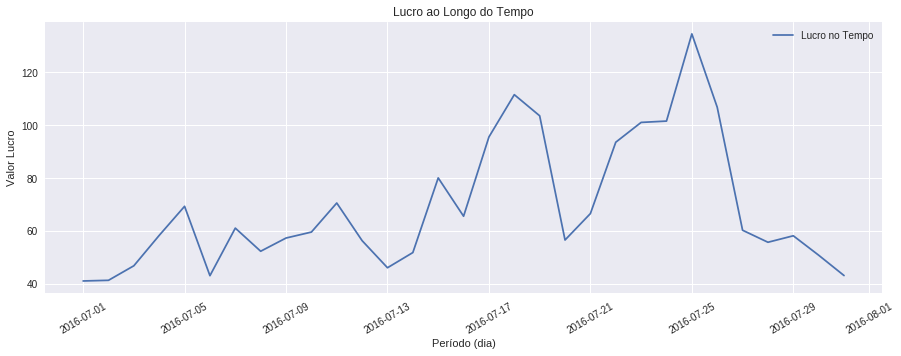

Comentário:
O Lucro vem alternando crescimento e descida ao longo das semanas com picos normalmente as terças-feiras.
O crescimento também aumenta a medida que as semanas do mês passam, retornando para o início entre a última semana do mês e o início do próximo.


In [0]:
grouped = lemon[['Date', 'Revenue']].groupby(['Date', 'Revenue']).count()
grouped.reset_index(inplace=True)

plt.xlabel('Período (dia)')
plt.xticks (rotation = 30, fontsize = 'small')
plt.ylabel('Valor Lucro')
plt.plot(grouped['Date'], grouped['Revenue'], label='Lucro no Tempo')
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Lucro ao Longo do Tempo')
plt.legend()

plt.show()

print('Comentário:\nO Lucro vem alternando crescimento e descida ao longo das semanas com picos normalmente as terças-feiras.')
print('O crescimento também aumenta a medida que as semanas do mês passam, retornando para o início entre a última semana do mês e o início do próximo.')



11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?

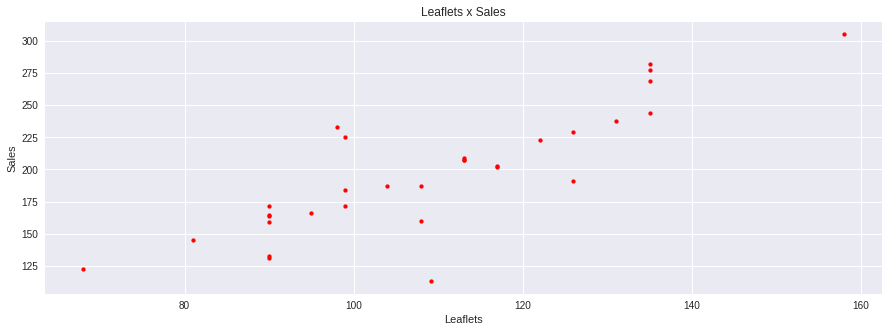

Coeficiente de correlação:  0.84 
Comentário: Existe a correlação, pois normalmente quanto maior a divulgação maior as vendas.


In [0]:
l = lemon['Leaflets']
s = lemon['Sales']

plt.scatter(l,s, color='r', s = 15)

plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.grid(True)
plt.title('Leaflets x Sales')

plt.show()

#EXISTE CORRELAÇÃO, POIS QUANTO MAIS 'LEAFLETS' DISTRIBUIDOS MAIOR A 'SALE'
print("Coeficiente de correlação: ", round(np.corrcoef(l, y=s)[0][1],2), '\nComentário: Existe a correlação, pois normalmente quanto maior a divulgação maior as vendas.')

12) crie um histograma que mostre o lucro (revenue) com 10 bins

In [0]:
import altair as alt
print('Comentário: A receita mais frequente ocorre entre as faixas de $40 e $70, apresentando pico na faixa entre 50 e 60.');

alt.Chart(pd.DataFrame(lemon['Revenue'], columns=['Revenue'])).mark_bar().encode(
    alt.X('Revenue:Q', axis=alt.Axis(title='Revenue'), bin=alt.Bin(maxbins=10)),
    alt.Y('count():Q', axis=alt.Axis(title='Frequency'))
).properties(
    title='Frequência de Vendas'
)

Comentário: A receita mais frequente ocorre entre as faixas de $40 e $70, apresentando pico na faixa entre 50 e 60.


Chart({
  data:     Revenue
  0     41.00
  20    56.50
  2     46.75
  1     41.25
  16    65.50
  15    80.00
  3     58.25
  17    95.50
  21    66.50
  13    46.00
  14    51.75
  19   103.50
  4     69.25
  22    93.50
  27    60.20
  9     57.25
  23   101.00
  29    58.10
  7     61.00
  18   111.50
  28    55.65
  24   101.50
  5     43.00
  10    59.50
  8     52.25
  30    50.75
  31    43.05
  26   106.75
  11    70.50
  12    56.25
  25   134.50,
  encoding: EncodingWithFacet({
    x: X({
      axis: Axis({
        title: 'Revenue'
      }),
      bin: BinParams({
        maxbins: 10
      }),
      shorthand: 'Revenue:Q'
    }),
    y: Y({
      axis: Axis({
        title: 'Frequency'
      }),
      shorthand: 'count():Q'
    })
  }),
  mark: 'bar',
  title: 'Frequência de Vendas'
})

13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo.


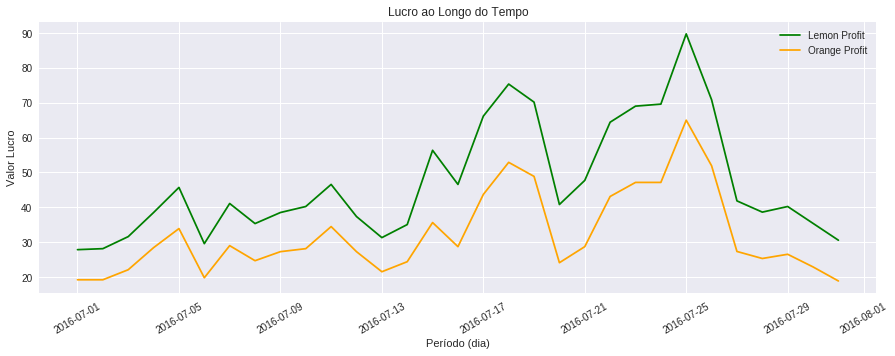

Comentário: A venda de laranja e limão tem praticamente o mesmo comportamento, variando apenas o volume vendido do limão que é maior.


In [0]:
lemon['LemonProfit'] = lemon['Lemon'] * lemon['Price']
lemon['OrangeProfit'] = lemon['Orange'] * lemon['Price']

lemonProfit = lemon[['Date', 'LemonProfit']].groupby(['Date', 'LemonProfit']).count()
lemonProfit.reset_index(inplace=True)

orangeProfit = lemon[['Date', 'OrangeProfit']].groupby(['Date', 'OrangeProfit']).count()
orangeProfit.reset_index(inplace=True)

plt.xlabel('Período (dia)')
plt.xticks (rotation = 30, fontsize = 'small')
plt.ylabel('Valor Lucro')
plt.plot(lemonProfit['Date'], lemonProfit['LemonProfit'], 'green', label='Lemon Profit')
plt.plot(orangeProfit['Date'], orangeProfit['OrangeProfit'], 'orange', label='Orange Profit')
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Lucro ao Longo do Tempo')

plt.legend()
plt.show()


print('Comentário: A venda de laranja e limão tem praticamente o mesmo comportamento, variando apenas o volume vendido do limão que é maior.')

14) usando regressão linear, prediga vendas a partir de:
- temperature
- leafltes
- price
- retorne o gráfico com a reta ajustada aos dados para cada variável

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def predict_sales_by(var):
  X = lemon[[var]].values
  y = lemon[['Sales']].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  lm = linear_model.LinearRegression()
  lm.fit(X_train, y_train)

  y_predicted = lm.predict(X_test)
  mse = mean_squared_error(y_test,y_predicted)

  var_x_sales = alt.Chart(pd.DataFrame(data={'X':X_test.flatten(), 'Y': y_test.flatten()})).mark_point().encode(
    x=alt.X('X',axis=alt.Axis(title='Sales')),
    y=alt.Y('Y',axis=alt.Axis(title=var))
  ).properties(
    title='Previsão de vendas sobre ' + var + '. MSE = ' + str(mse)
  )
  
  polynomial_fit = alt.Chart(pd.DataFrame(data={'X':X_test.flatten(), 'Y': y_predicted.flatten()})).mark_line(color='red').encode(
      x=alt.X('X'),
      y=alt.Y('Y')
  )
  
  return var_x_sales, polynomial_fit

temperature_points, temperature_line = predict_sales_by('Temperature')
leaflets_points, leaflets_line = predict_sales_by('Leaflets')
price_points, price_line = predict_sales_by('Price')

print("Comentário: Os gráficos demonstram correlações positivas ao comparar as features Temperature/Leaflets com Sales, ")
print(" indicando que são boas candidatas para uso na previsão das vendas. O mesmo não ocorre com a variável Price.")

(temperature_points + temperature_line)  & (price_points + price_line) | (leaflets_points + leaflets_line)  



Comentário: Os gráficos demonstram correlações positivas ao comparar as features Temperature/Leaflets com Sales, 
 indicando que são boas candidatas para uso na previsão das vendas. O mesmo não ocorre com a variável Price.


HConcatChart({
  hconcat: [VConcatChart({
    vconcat: [LayerChart({
      layer: [Chart({
        data:     X    Y
        0  83  305
        1  80  229
        2  82  238
        3  81  166
        4  77  133
        5  77  184
        6  84  225
        7  82  209
        8  78  277
        9  70  164,
        encoding: EncodingWithFacet({
          x: X({
            axis: Axis({
              title: 'Sales'
            }),
            shorthand: 'X'
          }),
          y: Y({
            axis: Axis({
              title: 'Temperature'
            }),
            shorthand: 'Y'
          })
        }),
        mark: 'point',
        title: 'Previsão de vendas sobre Temperature. MSE = 2335.6703495300335'
      }), Chart({
        data:     X           Y
        0  83  209.896514
        1  80  195.782597
        2  82  205.191875
        3  81  200.487236
        4  77  181.668680
        5  77  181.668680
        6  84  214.601153
        7  82  205.191875
        8  78  186.373319
        9  70  148.736206,
        encoding: EncodingWithFacet({
          x: X({
            shorthand: 'X'
          }),
          y: Y({
            shorthand: 'Y'
          })
        }),
        mark: MarkDef({
          color: 'red',
          type: 'line'
        })
      })]
    }), LayerChart({
      layer: [Chart({
        data:         X    Y
        0  0.4025  305
        1  0.2875  229
        2  0.2875  238
        3  0.4025  166
        4  0.5750  133
        5  0.2875  184
        6  0.2875  225
        7  0.2875  209
        8  0.2875  277
        9  0.2875  164,
        encoding: EncodingWithFacet({
          x: X({
            axis: Axis({
              title: 'Sales'
            }),
            shorthand: 'X'
          }),
          y: Y({
            axis: Axis({
              title: 'Price'
            }),
            shorthand: 'Y'
          })
        }),
        mark: 'point',
        title: 'Previsão de vendas sobre Price. MSE = 2674.9534541662993'
      }), Chart({
        data:         X           Y
        0  0.4025  191.810081
        1  0.2875  198.436544
        2  0.2875  198.436544
        3  0.4025  191.810081
        4  0.5750  181.870387
        5  0.2875  198.436544
        6  0.2875  198.436544
        7  0.2875  198.436544
        8  0.2875  198.436544
        9  0.2875  198.436544,
        encoding: EncodingWithFacet({
          x: X({
            shorthand: 'X'
          }),
          y: Y({
            shorthand: 'Y'
          })
        }),
        mark: MarkDef({
          color: 'red',
          type: 'line'
        })
      })]
    })]
  }), LayerChart({
    layer: [Chart({
      data:        X    Y
      0  158.0  305
      1  126.0  229
      2  131.0  238
      3   95.0  166
      4   90.0  133
      5   99.0  184
      6   99.0  225
      7  113.0  209
      8  135.0  277
      9   90.0  164,
      encoding: EncodingWithFacet({
        x: X({
          axis: Axis({
            title: 'Sales'
          }),
          shorthand: 'X'
        }),
        y: Y({
          axis: Axis({
            title: 'Leaflets'
          }),
          shorthand: 'Y'
        })
      }),
      mark: 'point',
      title: 'Previsão de vendas sobre Leaflets. MSE = 491.7666568194476'
    }), Chart({
      data:        X           Y
      0  158.0  286.868945
      1  126.0  225.573480
      2  131.0  235.150897
      3   95.0  166.193499
      4   90.0  156.616083
      5   99.0  173.855432
      6   99.0  173.855432
      7  113.0  200.672198
      8  135.0  242.812830
      9   90.0  156.616083,
      encoding: EncodingWithFacet({
        x: X({
          shorthand: 'X'
        }),
        y: Y({
          shorthand: 'Y'
        })
      }),
      mark: MarkDef({
        color: 'red',
        type: 'line'
      })
    })]
  })]
})

15) usando regressão linear, prediga vendas a partir das três variáveis juntas 

In [0]:
X = lemon[['Temperature', 'Leaflets', 'Price']].values
y = lemon[['Sales']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

y_predicted = lm.predict(X_test)

print("Comentário: O gráfico apresenta a correlação entre as vendas reais e as vendas previstas com base nas features Temperature, Leaflets e Price.")
print("Apesar do MSE não estar próximo de 0, o coeficiente de determinação apresenta um resultado razoável:")
print("MSE: ", mean_squared_error(y_test,y_predicted))
print("R²: ", lm.score(X_test, y_test))
alt.Chart(pd.DataFrame(data={'X':y_test.flatten(), 'Y': y_predicted.flatten()})).mark_point().encode(
    x=alt.X('X',axis=alt.Axis(title='Real Sales')),
    y=alt.Y('Y',axis=alt.Axis(title='Predicted Sales'))
).properties(
    title='Previsão de vendas'
)

Comentário: O gráfico apresenta a correlação entre as vendas reais e as vendas previstas com base nas features Temperature, Leaflets e Price.
Apesar do MSE não estar próximo de 0, o coeficiente de determinação apresenta um resultado razoável:
MSE:  274.75997764523004
R²:  0.8920477849893014


Chart({
  data:      X           Y
  0  305  310.035479
  1  229  250.730473
  2  238  267.118143
  3  166  178.317851
  4  133  134.494553
  5  184  187.374241
  6  225  209.933253
  7  209  231.326087
  8  277  262.181069
  9  164  146.919202,
  encoding: EncodingWithFacet({
    x: X({
      axis: Axis({
        title: 'Real Sales'
      }),
      shorthand: 'X'
    }),
    y: Y({
      axis: Axis({
        title: 'Predicted Sales'
      }),
      shorthand: 'Y'
    })
  }),
  mark: 'point',
  title: 'Previsão de vendas'
})

16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo
para que ele possa ser usado para regressão multivariada

In [0]:
class LinearRegression():
    
    def cost_function(self, X , y, theta):
      to_sum = np.power(((X @ theta.T)-y),2)
      return np.sum(to_sum)/(2 * len(X))
    
    def gradient_descent(self, X, y, theta, alpha, num_iter):
      cost = np.zeros(num_iter)
      
      for i in range(num_iter):
          theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
          cost[i] = self.cost_function(X, y, theta)

      return theta, cost


17) aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as
mesmas features para treinamento. Compare os resultados que você obteve com os resultados
obtidos através da Scikit Learning.

In [0]:
df_beer = pd.read_csv('https://raw.githubusercontent.com/miqueiaspnasc/eda/master/data/Consumo_cerveja.csv',nrows=365,delimiter=';')
df_beer = df_beer.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})

# Fazendo a previsão com a própria implementação
X = df_beer[['maxTemp','precip','weekend']]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = df_beer.loc[:,['consumo']].values 

theta = np.zeros([1,4])
iterations = 1500
alpha = 0.001

lr = LinearRegression()
theta_lr, custo_h = lr.gradient_descent(X,y,theta,alpha,iterations)
own_prediction = np.matmul(X,theta_lr[0])

# Fazendo a previsão com Scikit Learn
feature_col = ['maxTemp','precip','weekend']
meta_col = ['consumo']
X = df_beer[feature_col].values
y = df_beer[meta_col].values
split_test_size = 0.30
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y.ravel())
scikit_prediction = lr_model.predict(X)

print('O gráfico apresenta um comparativo das previsões feitas com o Scikit Learn X implementação que fizemos.')
print('Para mensurar o nível de assertividade, usamos a correlação e obtivemos o resultado abaixo:')
compared = pd.DataFrame(data={'Scikit Learn Implementation':scikit_prediction.flatten(), 'Own Implementation': own_prediction.flatten()})
print("Coeficiente de correlação: ", round(np.corrcoef(compared['Scikit Learn Implementation'], y=compared['Own Implementation'])[0][1],2))
alt.Chart(compared).mark_point().encode(
    x=alt.X('Scikit Learn Implementation'),
    y=alt.Y('Own Implementation')
).properties(
    title='Comparativo de previsão de consumo de cerveja'
)

O gráfico apresenta um comparativo das previsões feitas com o Scikit Learn X implementação que fizemos.
Para mensurar o nível de assertividade, usamos a correlação e obtivemos o resultado abaixo:
Coeficiente de correlação:  0.87


Chart({
  data:      Own Implementation  Scikit Learn Implementation
  0             30.496633                    28.159722
  1             31.424643                    28.828265
  2             29.557427                    31.605594
  3             28.295351                    30.667501
  4             26.598987                    25.351843
  5             28.074715                    26.121269
  6             31.610246                    28.961973
  7             28.520728                    25.566312
  8             31.684555                    28.909584
  9             33.547874                    34.480327
  10            33.946971                    34.685990
  11            33.187864                    30.098496
  12            32.593950                    29.651379
  13            31.814433                    29.070554
  14            30.635881                    28.187818
  15            30.589465                    28.178452
  16            35.032691                    35.549996
  17            34.847089                    35.416287
  18            34.037052                    30.621183
  19            33.345635                    30.197711
  20            29.011815                    27.090054
  21            23.119430                    22.098886
  22            24.390377                    23.674088
  23            28.490418                    30.523964
  24            29.650228                    31.672448
  25            26.005385                    24.423486
  26            26.914529                    25.550273
  27            27.856518                    26.139814
  28            27.434197                    25.953531
  29            25.299772                    24.415883
  ..                  ...                          ...
  335           27.619799                    26.087240
  336           24.557363                    23.881049
  337           27.341396                    25.886677
  338           30.202396                    32.067825
  339           27.789568                    30.329614
  340           20.298540                    19.662274
  341           26.320584                    25.151280
  342           26.227783                    25.084426
  343           26.042180                    24.950717
  344           28.455009                    26.688928
  345           30.392637                    32.207282
  346           30.012343                    31.639623
  347           30.403863                    28.044744
  348           30.589496                    28.130328
  349           23.281372                    22.925710
  350           26.970191                    25.619260
  351           31.420005                    28.822516
  352           30.796342                    32.466818
  353           28.332584                    30.520997
  354           26.079726                    24.322972
  355           28.409280                    25.620835
  356           30.264677                    27.920400
  357           29.410913                    27.295716
  358           27.295604                    24.914831
  359           25.067335                    26.088769
  360           27.348974                    29.687219
  361           25.114170                    24.282175
  362           22.223577                    21.951825
  363           20.831498                    21.045260
  364           27.248595                    25.819823
  
  [365 rows x 2 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'Scikit Learn Implementation'
    }),
    y: Y({
      shorthand: 'Own Implementation'
    })
  }),
  mark: 'point',
  title: 'Comparativo de previsão de consumo de cerveja'
})